In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("input/US_Accidents_March23.csv")

In [3]:
sample = 500000
df_sample = df.sample(n=sample, random_state=42)

In [4]:
print(df_sample.shape)
print(df_sample.info())
print(df_sample.describe())
print(df_sample.head(5))

(500000, 46)
<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 7133276 to 5228853
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279324 non-null  float64
 8   End_Lng                279324 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499267 non-null  object 
 12  City                   499985 non-null  object 
 13  County                 500000 non-null  object 
 14  State                

In [7]:
missing_perc = df_sample.isnull().sum() / len(df_sample) * 100
print(missing_perc.sort_values(ascending=False).head(10))

End_Lng              44.1352
End_Lat              44.1352
Precipitation(in)    28.5598
Wind_Chill(F)        25.8950
Wind_Speed(mph)       7.4180
Visibility(mi)        2.2812
Wind_Direction        2.2692
Humidity(%)           2.2460
Weather_Condition     2.2284
Temperature(F)        2.1096
dtype: float64


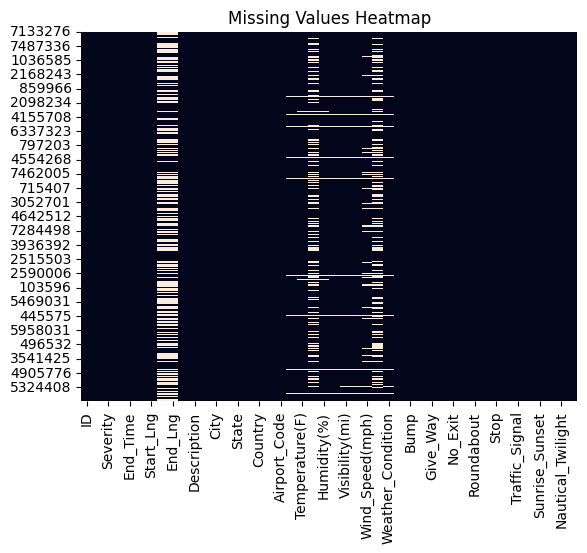

In [9]:
sns.heatmap(df_sample.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
drop_columns = ['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)']
df_clean = df_sample.drop(columns=drop_columns)

Wind_Speed(mph)       7.4180
Visibility(mi)        2.2812
Wind_Direction        2.2692
Humidity(%)           2.2460
Weather_Condition     2.2284
Temperature(F)        2.1096

In [13]:

df_clean['Temperature(F)'].fillna(df_clean['Temperature(F)'].mean(), inplace=True)

/tmp/ipykernel_129758/1639462357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Temperature(F)'].fillna(df_clean['Temperature(F)'].mean(), inplace=True)


In [15]:
df_clean['Visibility(mi)'].fillna(df_clean['Visibility(mi)'].mean(), inplace=True)
df_clean['Wind_Direction'].fillna('Unknown', inplace=True)
df_clean['Humidity(%)'].fillna(df_clean['Humidity(%)'].mean(), inplace=True)
df_clean['Weather_Condition'].fillna('Unknown', inplace=True)

/tmp/ipykernel_129758/1797210538.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Visibility(mi)'].fillna(df_clean['Visibility(mi)'].mean(), inplace=True)
/tmp/ipykernel_129758/1797210538.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

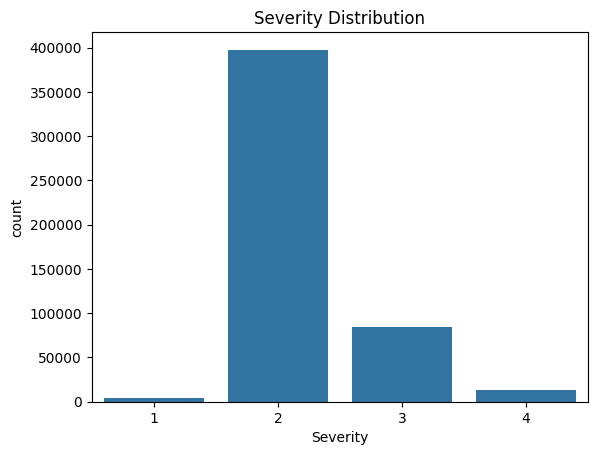

Severity
2    79.5530
3    16.9086
4     2.6618
1     0.8766
Name: proportion, dtype: float64


In [17]:
sns.countplot(x='Severity', data=df_clean)
plt.title("Severity Distribution")
plt.show()

print(df_clean['Severity'].value_counts(normalize=True) * 100)

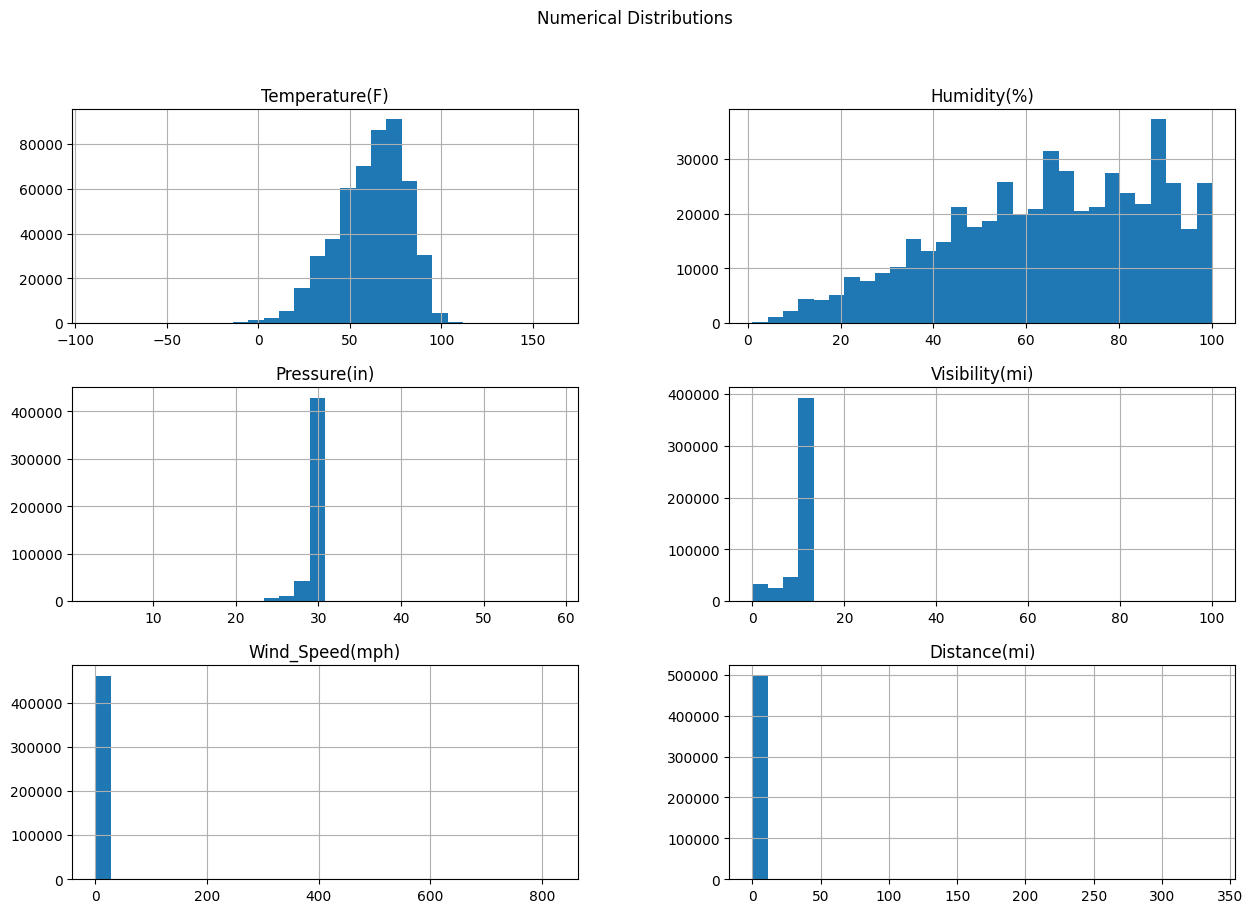

In [18]:
num_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Distance(mi)']
df_clean[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle('Numerical Distributions')
plt.show()

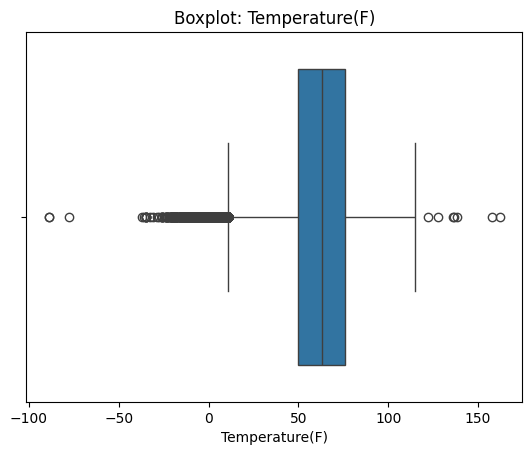

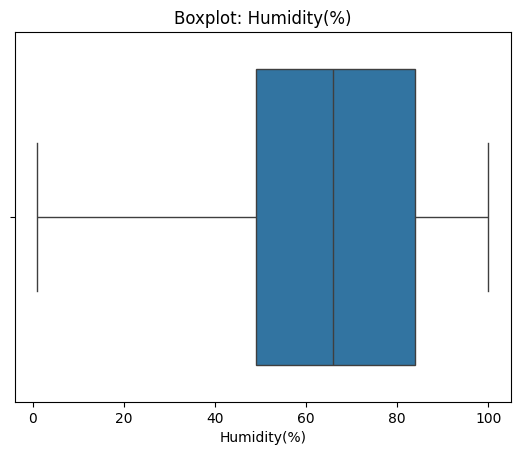

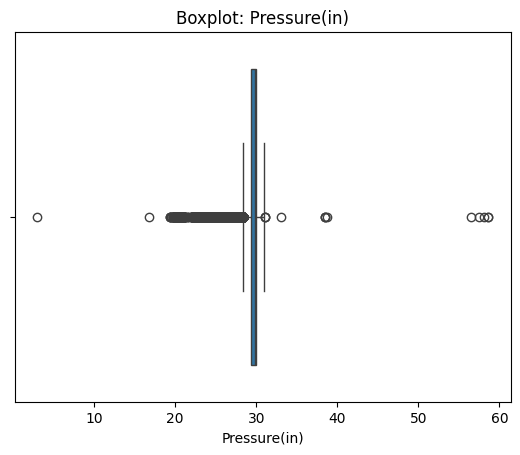

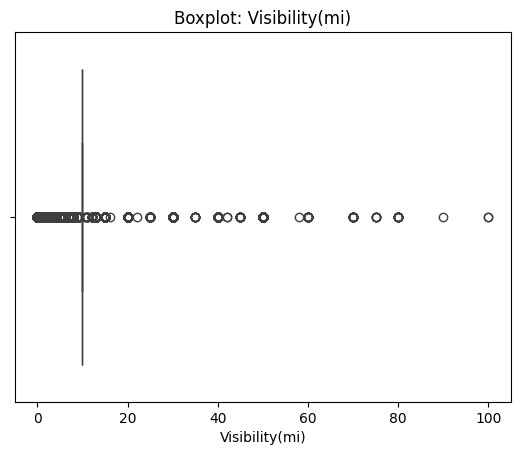

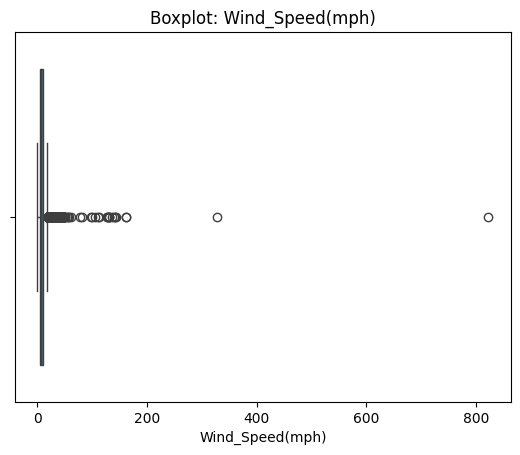

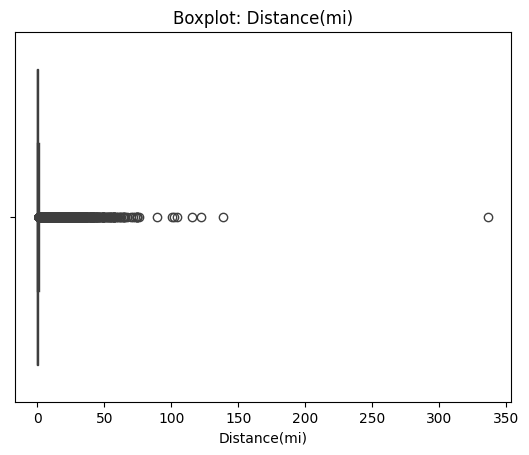

In [19]:
# Boxplots for outliers
for col in num_cols:
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

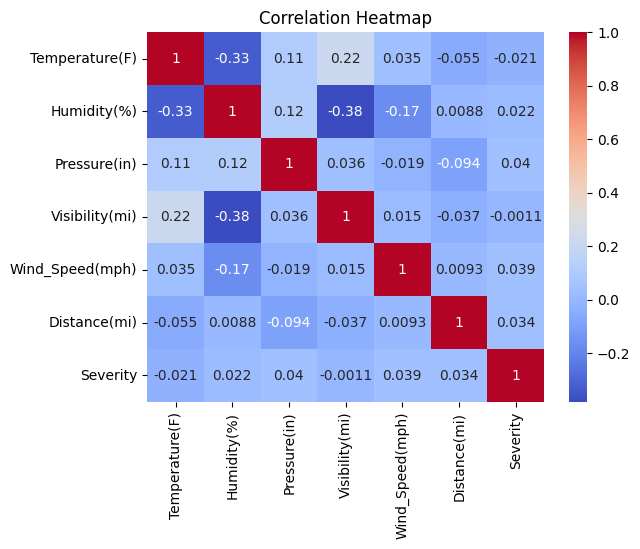

In [20]:
corr = df_clean[num_cols + ['Severity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## High-cardinality like City (group top 10), State, Weather_Condition.
Value counts, bars

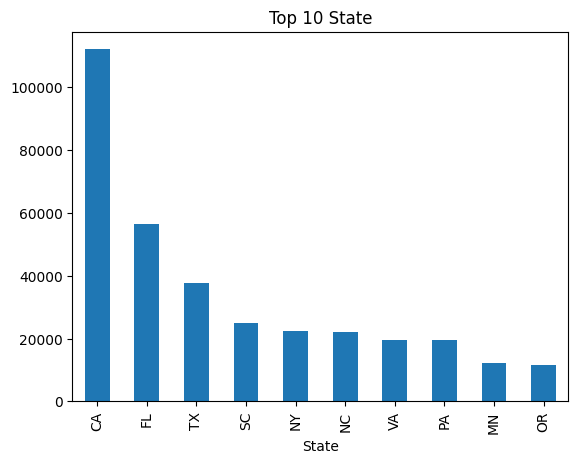

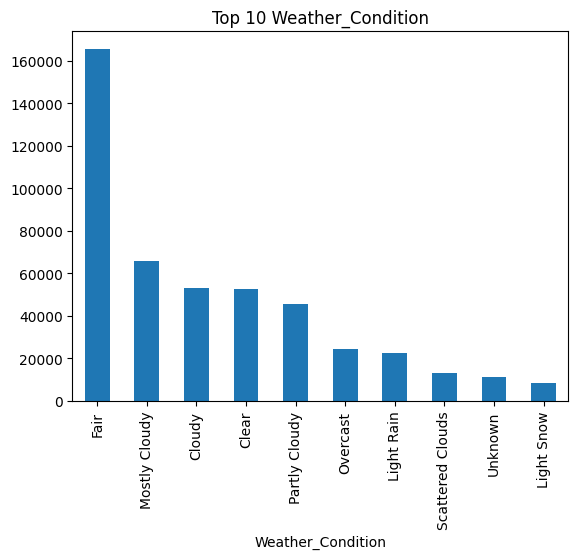

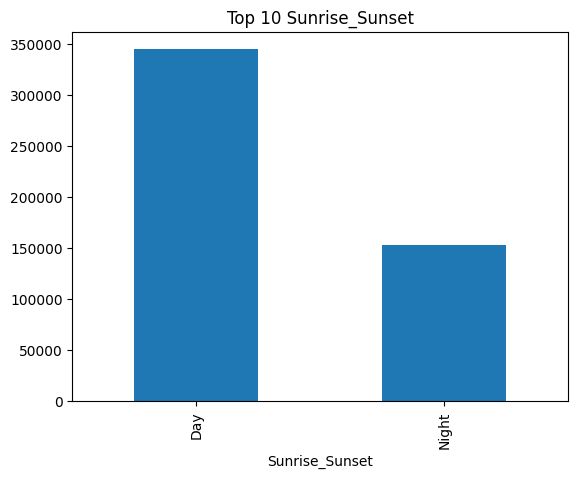

In [22]:
cat_cols = ['State', 'Weather_Condition', 'Sunrise_Sunset']
for col in cat_cols:
    top10 = df_clean[col].value_counts().head(10)
    top10.plot(kind='bar')
    plt.title(f'Top 10 {col}')
    plt.show()

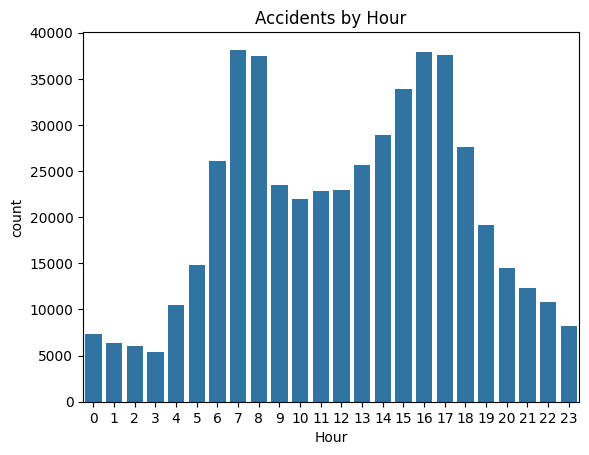

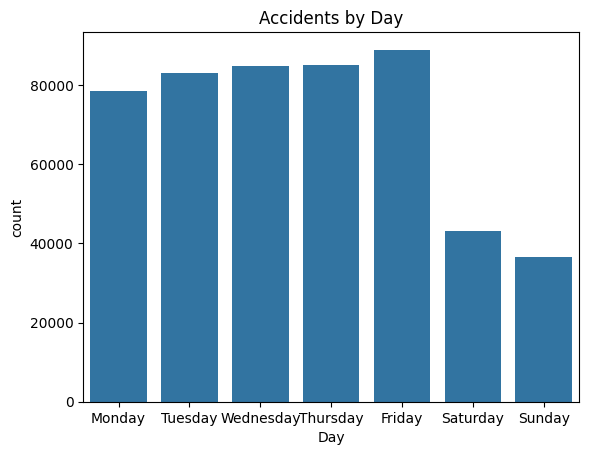

In [24]:
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'], format='mixed')
df_clean['Hour'] = df_clean['Start_Time'].dt.hour
df_clean['Day'] = df_clean['Start_Time'].dt.day_name()
df_clean['Month'] = df_clean['Start_Time'].dt.month
df_clean['Year'] = df_clean['Start_Time'].dt.year

sns.countplot(x='Hour', data=df_clean)
plt.title('Accidents by Hour')
plt.show()

sns.countplot(x='Day', data=df_clean, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accidents by Day')
plt.show()

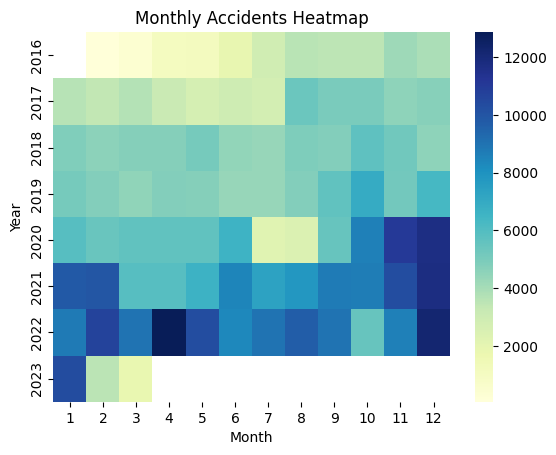

In [25]:
# Group by year/month
monthly = df_clean.groupby(['Year', 'Month']).size().unstack()
sns.heatmap(monthly, cmap='YlGnBu')
plt.title('Monthly Accidents Heatmap')
plt.show()

## Hotspots for vizualization